In [50]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!cat /content/Order_Data.csv #Display content Files for order data

In [ ]:
!cat /content/product_data.csv #Display content Files for product data

In [53]:
Orders = pd.read_csv('/content/Order_Data.csv') #Create dataframe for orders

In [54]:
Orders.head(10) #display top 10 columns from dataframe

,column1,Benefit_per_order,Order_City,Order_Country,Order_Customer_Id,order_date_DateOrders,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,...,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Order_Zipcode,Sales,Type
0,0,91.250000,Bekasi,Indonesia,20755,2018-01-31 22:56:00.0000000,77202,1360,13.110000,0.04,...,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,327.75,DEBIT
1,1,-249.089996,Bikaner,India,19492,2018-01-13 12:27:00.0000000,75939,1360,16.389999,0.05,...,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,327.75,TRANSFER
2,2,-247.779999,Bikaner,India,19491,2018-01-13 12:06:00.0000000,75938,1360,18.030001,0.06,...,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,327.75,CASH
3,3,22.860001,Townsville,Australia,19490,2018-01-13 11:45:00.0000000,75937,1360,22.940001,0.07,...,0.08,1,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,327.75,DEBIT
4,4,134.210007,Townsville,Australia,19489,2018-01-13 11:24:00.0000000,75936,1360,29.500000,0.09,...,0.45,1,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,327.75,PAYMENT
5,5,18.580000,Toowoomba,Australia,19488,2018-01-13 11:03:00.0000000,75935,1360,32.779999,0.10,...,0.06,1,294.980011,18.580000,Oceania,Queensland,CANCELED,NaN,327.75,TRANSFER
6,6,95.180000,Guangzhou,China,19487,2018-01-13 10:42:00.0000000,75934,1360,39.330002,0.12,...,0.33,1,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,NaN,327.75,DEBIT
7,7,68.430000,Guangzhou,China,19486,2018-01-13 10:21:00.0000000,75933,1360,42.610001,0.13,...,0.24,1,285.140015,68.430000,Eastern Asia,Guangdong,PROCESSING,NaN,327.75,TRANSFER
8,8,133.720001,Guangzhou,China,19485,2018-01-13 10:00:00.0000000,75932,1360,49.160000,0.15,...,0.48,1,278.589996,133.720001,Eastern Asia,Guangdong,CLOSED,NaN,327.75,CASH
9,9,132.149994,Guangzhou,China,19484,2018-01-13 09:39:00.0000000,75931,1360,52.439999,0.16,...,0.48,1,275.309998,132.149994,Eastern Asia,Guangdong,CLOSED,NaN,327.75,CASH


In [55]:
product = pd.read_csv('/content/product_data.csv') #Create dataframe for products

In [56]:
product.head(10) #display top 10

,column1,Category_Id,Category_Name,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status
0,0,73,Sporting Goods,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0
1,1,17,Cleats,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0
2,2,29,Shop By Sport,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0
3,3,24,Women's Apparel,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0
4,4,13,Electronics,278,13,NaN,http://images.acmesports.sports/Under+Armour+M...,Under Armour Men's Compression EV SL Slide,44.990002,0
5,5,12,Boxing & MMA,249,12,NaN,http://images.acmesports.sports/Under+Armour+W...,Under Armour Women's Micro G Skulpt Running S,54.970001,0
6,6,9,Cardio Equipment,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0
7,7,41,Trade-In,917,41,NaN,http://images.acmesports.sports/Glove+It+Women...,Glove It Women's Mod Oval 3-Zip Carry All Gol,21.990000,0
8,8,37,Electronics,828,37,NaN,http://images.acmesports.sports/Bridgestone+e6...,Bridgestone e6 Straight Distance NFL San Dieg,31.990000,0
9,9,29,Shop By Sport,642,29,NaN,http://images.acmesports.sports/Columbia+Men%2...,Columbia Men's PFG Anchor Tough T-Shirt,30.000000,0


In [57]:
#Cleaning up data and merging both Orders and product sheets
merged_data = pd.merge(Orders, product, left_on='Order_Item_Cardprod_Id', right_on='Product_Card_Id')
columns_to_keep = ['Category_Name', 'Sales', 'Order_Item_Cardprod_Id', 'Product_Card_Id', 'Product_Name','Product_Price','Order_Item_Total','order_date_DateOrders','Product_Card_Id', 'Order_City',	'Order_Country',	'Order_Customer_Id','Order_Profit_Per_Order',	'Order_Region',	'Order_State',	'Order_State' ]
new = merged_data[columns_to_keep]

In [58]:
new.head(10)

,Category_Name,Sales,Order_Item_Cardprod_Id,Product_Card_Id,Product_Name,Product_Price,Order_Item_Total,order_date_DateOrders,Product_Card_Id,Order_City,Order_Country,Order_Customer_Id,Order_Profit_Per_Order,Order_Region,Order_State,Order_State
0,Sporting Goods,327.75,1360,1360,Smart watch,327.75,314.640015,2018-01-31 22:56:00.0000000,1360,Bekasi,Indonesia,20755,91.250000,Southeast Asia,Java Occidental,Java Occidental
1,Sporting Goods,327.75,1360,1360,Smart watch,327.75,311.359985,2018-01-13 12:27:00.0000000,1360,Bikaner,India,19492,-249.089996,South Asia,Rajastán,Rajastán
2,Sporting Goods,327.75,1360,1360,Smart watch,327.75,309.720001,2018-01-13 12:06:00.0000000,1360,Bikaner,India,19491,-247.779999,South Asia,Rajastán,Rajastán
3,Sporting Goods,327.75,1360,1360,Smart watch,327.75,304.809998,2018-01-13 11:45:00.0000000,1360,Townsville,Australia,19490,22.860001,Oceania,Queensland,Queensland
4,Sporting Goods,327.75,1360,1360,Smart watch,327.75,298.250000,2018-01-13 11:24:00.0000000,1360,Townsville,Australia,19489,134.210007,Oceania,Queensland,Queensland
5,Sporting Goods,327.75,1360,1360,Smart watch,327.75,294.980011,2018-01-13 11:03:00.0000000,1360,Toowoomba,Australia,19488,18.580000,Oceania,Queensland,Queensland
6,Sporting Goods,327.75,1360,1360,Smart watch,327.75,288.420013,2018-01-13 10:42:00.0000000,1360,Guangzhou,China,19487,95.180000,Eastern Asia,Guangdong,Guangdong
7,Sporting Goods,327.75,1360,1360,Smart watch,327.75,285.140015,2018-01-13 10:21:00.0000000,1360,Guangzhou,China,19486,68.430000,Eastern Asia,Guangdong,Guangdong
8,Sporting Goods,327.75,1360,1360,Smart watch,327.75,278.589996,2018-01-13 10:00:00.0000000,1360,Guangzhou,China,19485,133.720001,Eastern Asia,Guangdong,Guangdong
9,Sporting Goods,327.75,1360,1360,Smart watch,327.75,275.309998,2018-01-13 09:39:00.0000000,1360,Guangzhou,China,19484,132.149994,Eastern Asia,Guangdong,Guangdong


In [59]:
product['Category_Name'] #list of all products

0            Sporting Goods
1                    Cleats
2             Shop By Sport
3           Women's Apparel
4               Electronics
               ...         
113        Men's Golf Clubs
114                    Toys
115            Water Sports
116            Water Sports
117    Indoor/Outdoor Games
Name: Category_Name, Length: 118, dtype: object

In [60]:
 new['Category_Name'].unique() #find all products categories

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games'], dtype=object)

In [61]:
# creating new dataframa for the revenue from top 5 products

most_sales = new.groupby('Product_Name').sum().sort_values('Sales', ascending=False).head()
most_sales


<ipython-input-61-cdb1bc01950a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_sales = new.groupby('Product_Name').sum().sort_values('Sales', ascending=False).head()


,Sales,Order_Item_Cardprod_Id,Product_Card_Id,Product_Price,Order_Item_Total,Product_Card_Id,Order_Customer_Id,Order_Profit_Per_Order
Product_Name,,,,,,,,
Perfect Fitness Perfect Rip Deck,172711.215748,297110,297110,48831.861366,155089.552975,297110,5071879,15483.190067
Nike Men's Free 5.0+ Running Shoe,142385.760803,76591,76591,40095.989143,127520.639499,76591,2529192,11852.199997
Nike Men's Dri-FIT Victory Golf Polo,131800.000000,364954,364954,36350.000000,118094.500000,364954,4606543,14315.959972
Smart watch,117006.750000,485520,485520,117006.750000,105063.611511,485520,6533202,12518.610119
Diamondback Women's Serene Classic Comfort Bi,115192.324219,367488,367488,115192.324219,103033.582474,367488,2499740,13777.579958


In [62]:
# Identify top 5 products seasonal trends
new['order_date_DateOrders'] = pd.to_datetime(new['order_date_DateOrders']) # Convert the order date column to datetime

<ipython-input-62-8122d4f2c471>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['order_date_DateOrders'] = pd.to_datetime(new['order_date_DateOrders']) # Convert the order date column to datetime


In [63]:
# Extract month from the order date and Identify the top 5 products based on sales volume
new['Month'] = new['order_date_DateOrders'].dt.month
top_products = new['Product_Name'].value_counts().nlargest(5).index

<ipython-input-63-5913a2829b4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Month'] = new['order_date_DateOrders'].dt.month


In [64]:
# Filter data to include only top 5 products and Group  it by product and month, then sum up the sales
top_products_data = new[new['Product_Name'].isin(top_products)]
monthly_sales_top_products = top_products_data.groupby(['Product_Name', 'Month']).agg({'Order_Item_Total': 'sum'}).reset_index()


In [65]:
# create a Pivot the data for plotting
pivot_data = monthly_sales_top_products.pivot(index='Month', columns='Product_Name', values='Order_Item_Total')

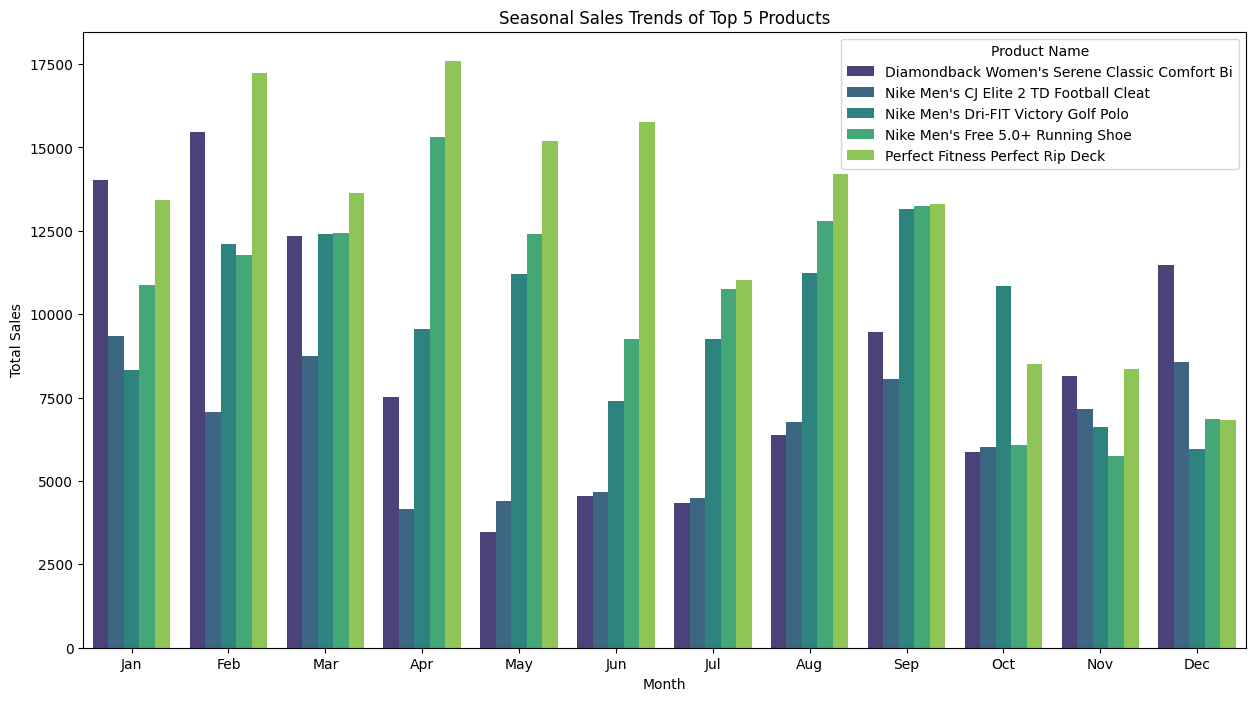

In [66]:
# Plotting the data using a bar graph
plt.figure(figsize=(15, 8))
sns.barplot(x='Month', y='Order_Item_Total', hue='Product_Name', data=monthly_sales_top_products, palette="viridis")

plt.title('Seasonal Sales Trends of Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Name')
plt.show()

In [67]:
top_products = new['Product_Name'].value_counts().nlargest(5).index # Find the sum of sales for each of the top 5 products sold

# Filter data to include only top 5 products
top_products_data = new[new['Product_Name'].isin(top_products)]

# Calculate total revenue for each of the top 5 products
total_revenue_top_products = top_products_data.groupby('Product_Name')['Order_Item_Total'].sum()

total_revenue_top_products

Product_Name
Diamondback Women's Serene Classic Comfort Bi    103033.582474
Nike Men's CJ Elite 2 TD Football Cleat           79441.359365
Nike Men's Dri-FIT Victory Golf Polo             118094.500000
Nike Men's Free 5.0+ Running Shoe                127520.639499
Perfect Fitness Perfect Rip Deck                 155089.552975
Name: Order_Item_Total, dtype: float64

In [68]:
top_5_countries = merged_data.groupby('Order_Country')['Sales'].sum().sort_values(ascending=False).head(5).index.tolist() # top 5 countries with sales

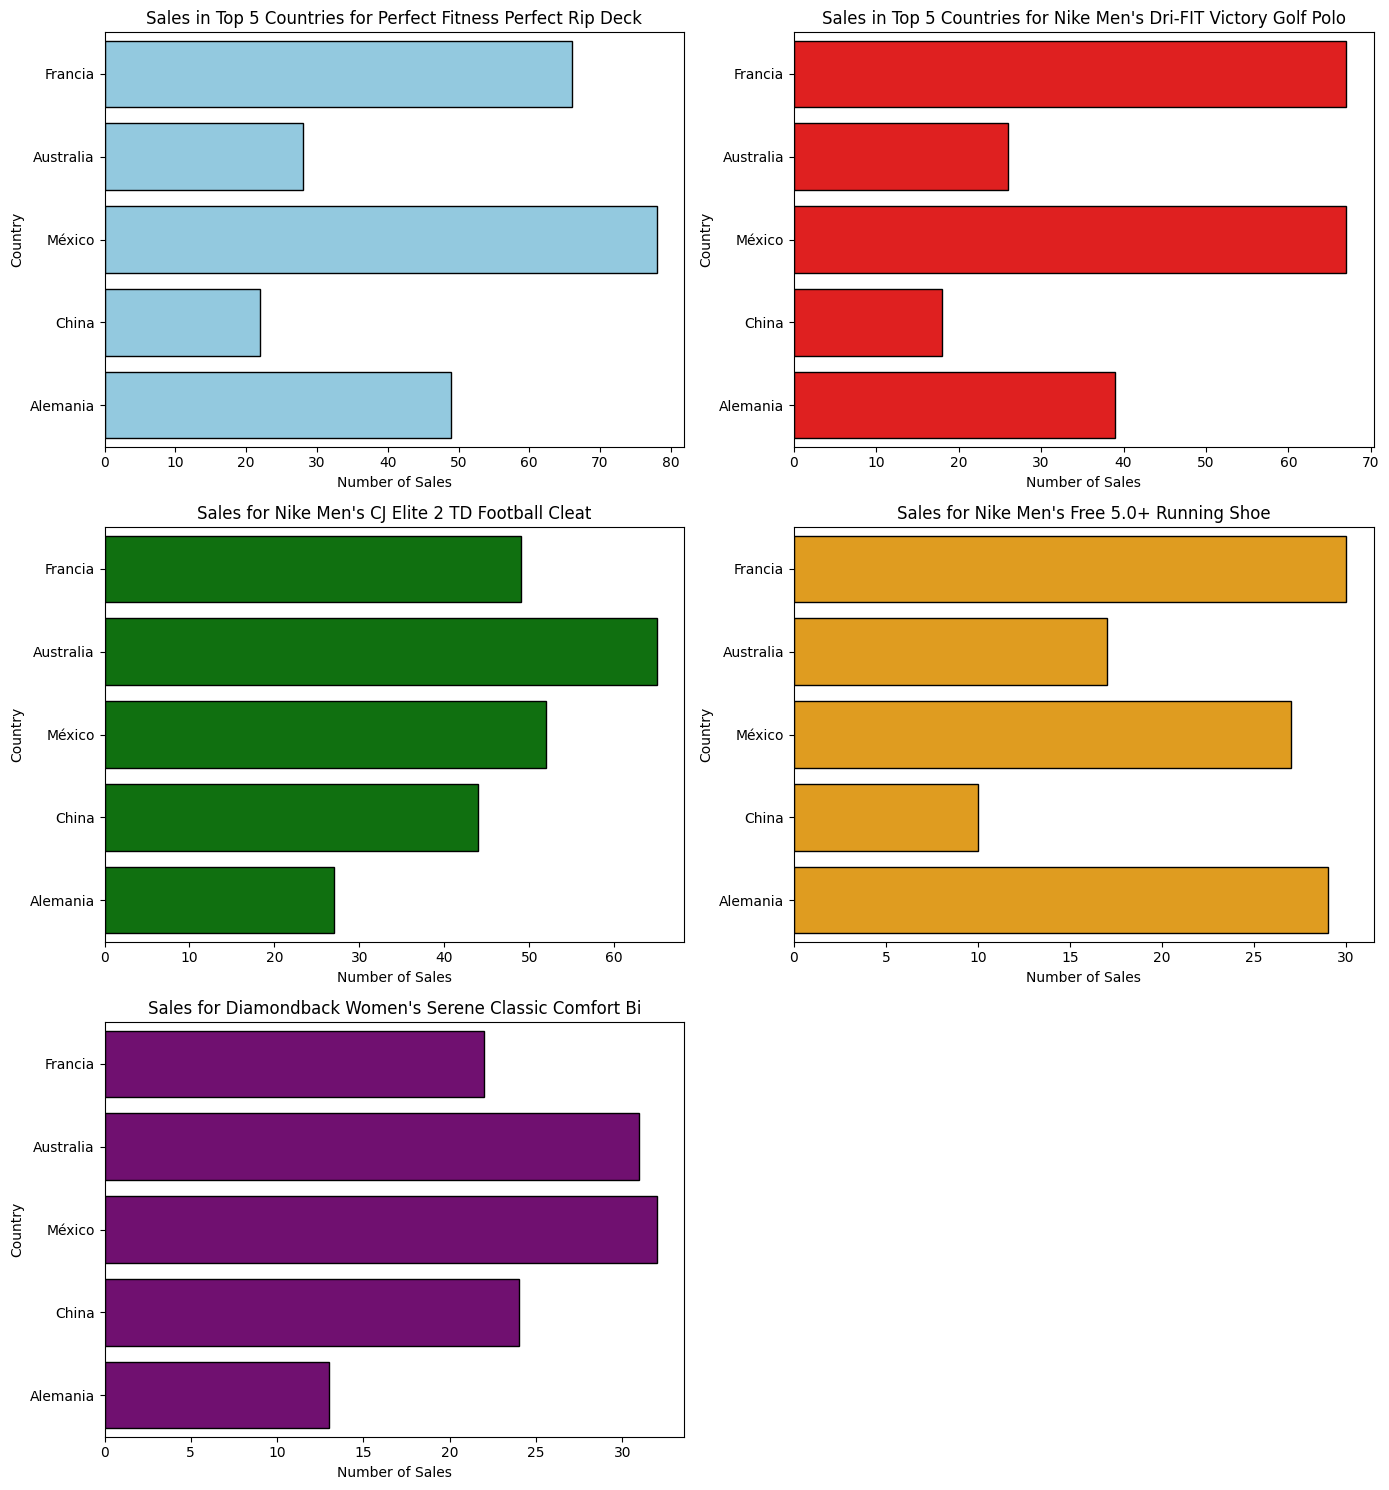

In [69]:

# Set up the matplotlib figure on a 3x2 grid with a size of 14x15
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Product 1
sns.countplot(data=new[new['Product_Name'] == top_products[0]],
              y='Order_Country', order=top_5_countries, ax=axes[0, 0],
              color="skyblue", edgecolor="black")
axes[0, 0].set_title(f'Sales in Top 5 Countries for {top_products[0]}')
axes[0, 0].set_xlabel('Number of Sales')
axes[0, 0].set_ylabel('Country')

# Product 2
sns.countplot(data=new[new['Product_Name'] == top_products[1]],
              y='Order_Country', order=top_5_countries, ax=axes[0, 1], color="red", edgecolor="black")
axes[0, 1].set_title(f'Sales in Top 5 Countries for {top_products[1]}')
axes[0, 1].set_xlabel('Number of Sales')
axes[0, 1].set_ylabel('Country')

# Product 3
sns.countplot(data=new[new['Product_Name'] == top_products[2]],
              y='Order_Country', order=top_5_countries, ax=axes[1, 0], color="green", edgecolor="black")
axes[1, 0].set_title(f'Sales for {top_products[2]}')
axes[1, 0].set_xlabel('Number of Sales')
axes[1, 0].set_ylabel('Country')

# Product 4
sns.countplot(data=new[new['Product_Name'] == top_products[3]],
              y='Order_Country', order=top_5_countries, ax=axes[1, 1], color="orange", edgecolor="black")
axes[1, 1].set_title(f'Sales for {top_products[3]}')
axes[1, 1].set_xlabel('Number of Sales')
axes[1, 1].set_ylabel('Country')

# Product 5
sns.countplot(data=new[new['Product_Name'] == top_products[4]],
              y='Order_Country', order=top_5_countries, ax=axes[2, 0], color="purple", edgecolor="black")
axes[2, 0].set_title(f'Sales for {top_products[4]}')
axes[2, 0].set_xlabel('Number of Sales')
axes[2, 0].set_ylabel('Country')

# Remove the last empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [ ]:
!cat /content/Joint_table.csv

In [71]:
results_df=pd.read_csv("/content/Joint_table.csv")

In [72]:
results_df["Order_City"]=results_df["Order_City"].astype("string")

In [73]:
table_df=results_df.groupby(['Order_Country'],as_index=False).sum()
table_df

<ipython-input-73-b2c2fd421391>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table_df=results_df.groupby(['Order_Country'],as_index=False).sum()


,Order_Country,Product_Price,Order_Item_CardProd_Id,Order_Customer_Id,Order_Profit_Per_Order
0,Afganistán,1427.950006,8415,106256,-82.769999
1,Alemania,26775.030569,129953,1683652,4672.170075
2,Angola,826.940022,2975,51658,325.580001
3,Arabia Saudí,3124.740109,11770,170212,259.469988
4,Argelia,383.950003,2748,58351,359.600002
...,...,...,...,...,...
117,Venezuela,1991.820038,9993,147349,1441.159991
118,Vietnam,6974.380079,28340,406645,1000.589995
119,Yemen,50.000000,502,9248,92.629997
120,Zambia,149.989998,693,15696,-166.340012


In [74]:
table_df=table_df.sort_values("Order_Profit_Per_Order", ascending=False).head(5)
table_df=table_df[["Order_Country","Order_Profit_Per_Order"]]
table_df

,Order_Country,Order_Profit_Per_Order
42,Francia,9471.819968
75,México,9022.970079
90,Reino Unido,7850.179965
6,Australia,7764.430036
23,China,7710.430033


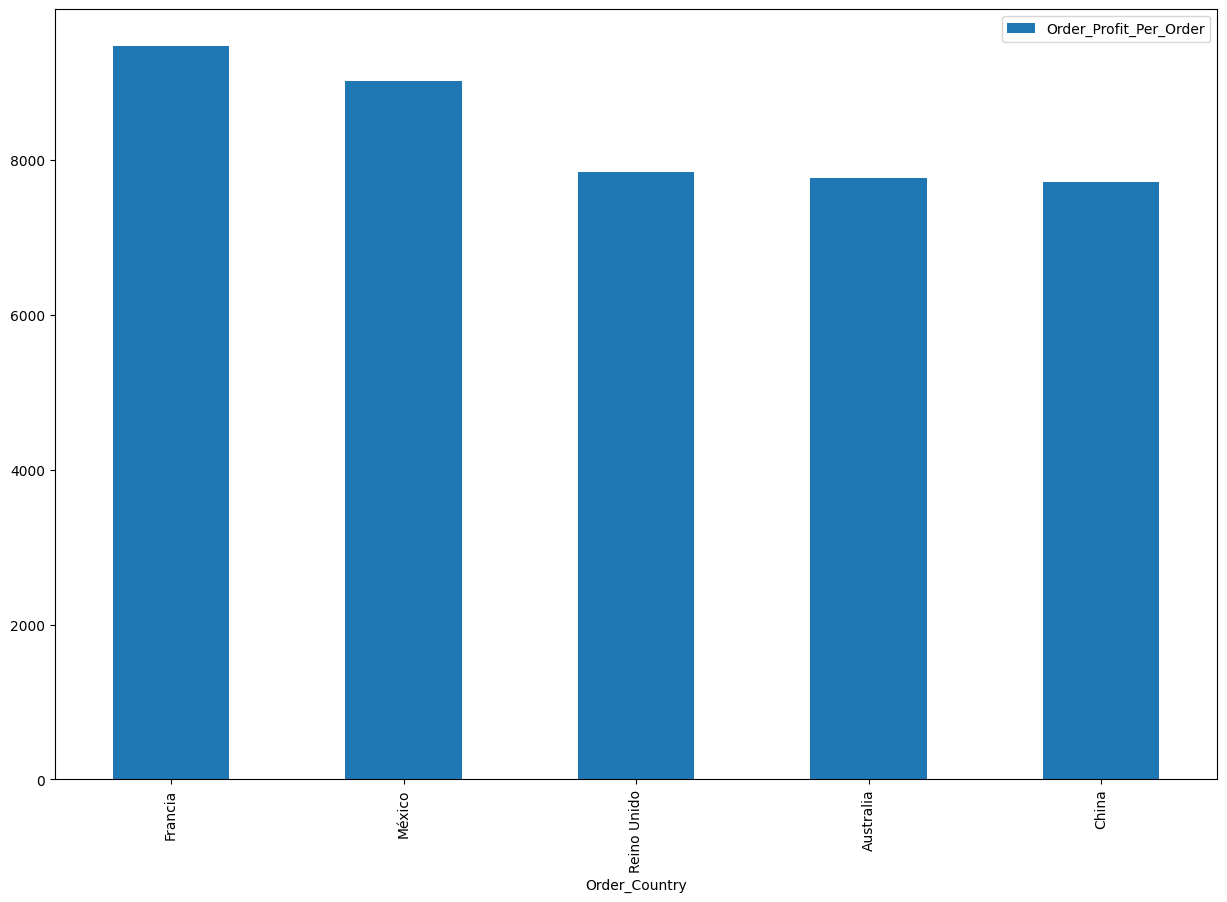

In [75]:
table_df.plot.bar(x="Order_Country",y="Order_Profit_Per_Order",rot=90,figsize=(15,10));

[Text(0, 0, '9471.82'),
 Text(0, 0, '9022.97'),
 Text(0, 0, '7850.18'),
 Text(0, 0, '7764.43'),
 Text(0, 0, '7710.43')]

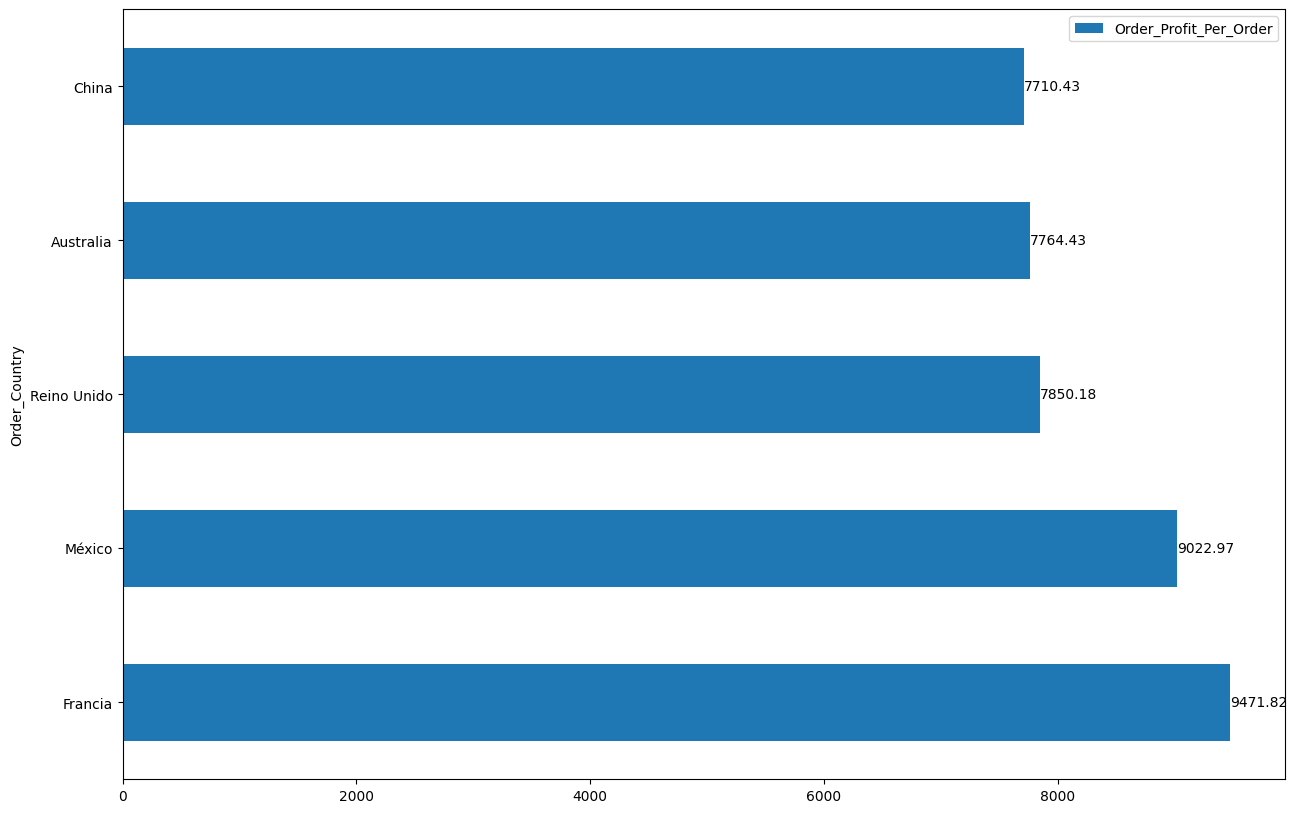

In [76]:
ax=table_df.plot.barh(x="Order_Country",y="Order_Profit_Per_Order",rot=0,figsize=(15,10));
ax.bar_label(ax.containers[0])

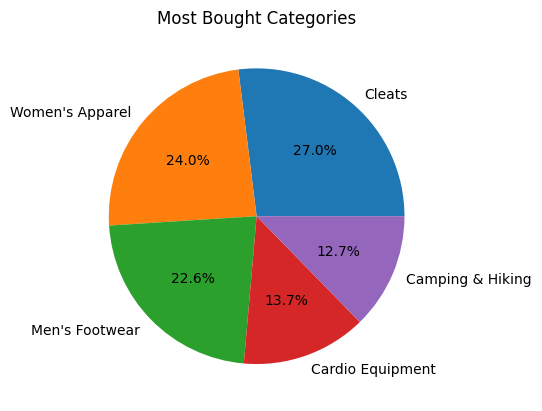

In [77]:
top_categories = results_df['Category_Name'].value_counts().head(5)
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
plt.title('Most Bought Categories')
plt.show()

<Axes: title={'center': 'Most Categories bought in France'}>

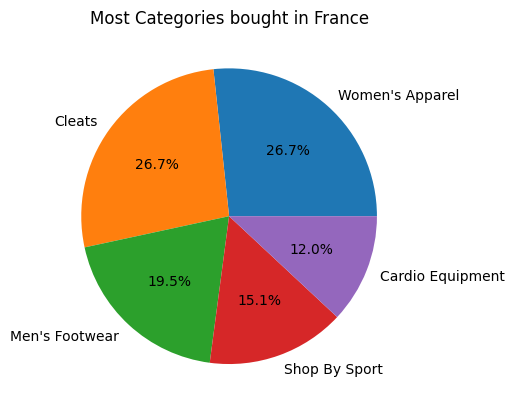

In [78]:
results_df[results_df.Order_Country == 'Francia'].groupby('Category_Name').size().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%', title='Most Categories bought in France')


In [79]:
product_df=results_df[["Order_Country","Product_Name"]]
product_df

,Order_Country,Product_Name
0,Indonesia,Smart watch
1,India,Smart watch
2,India,Smart watch
3,Australia,Smart watch
4,Australia,Smart watch
...,...,...
4995,Irak,Perfect Fitness Perfect Rip Deck
4996,Irak,Perfect Fitness Perfect Rip Deck
4997,China,Perfect Fitness Perfect Rip Deck
4998,Nueva Zelanda,Perfect Fitness Perfect Rip Deck


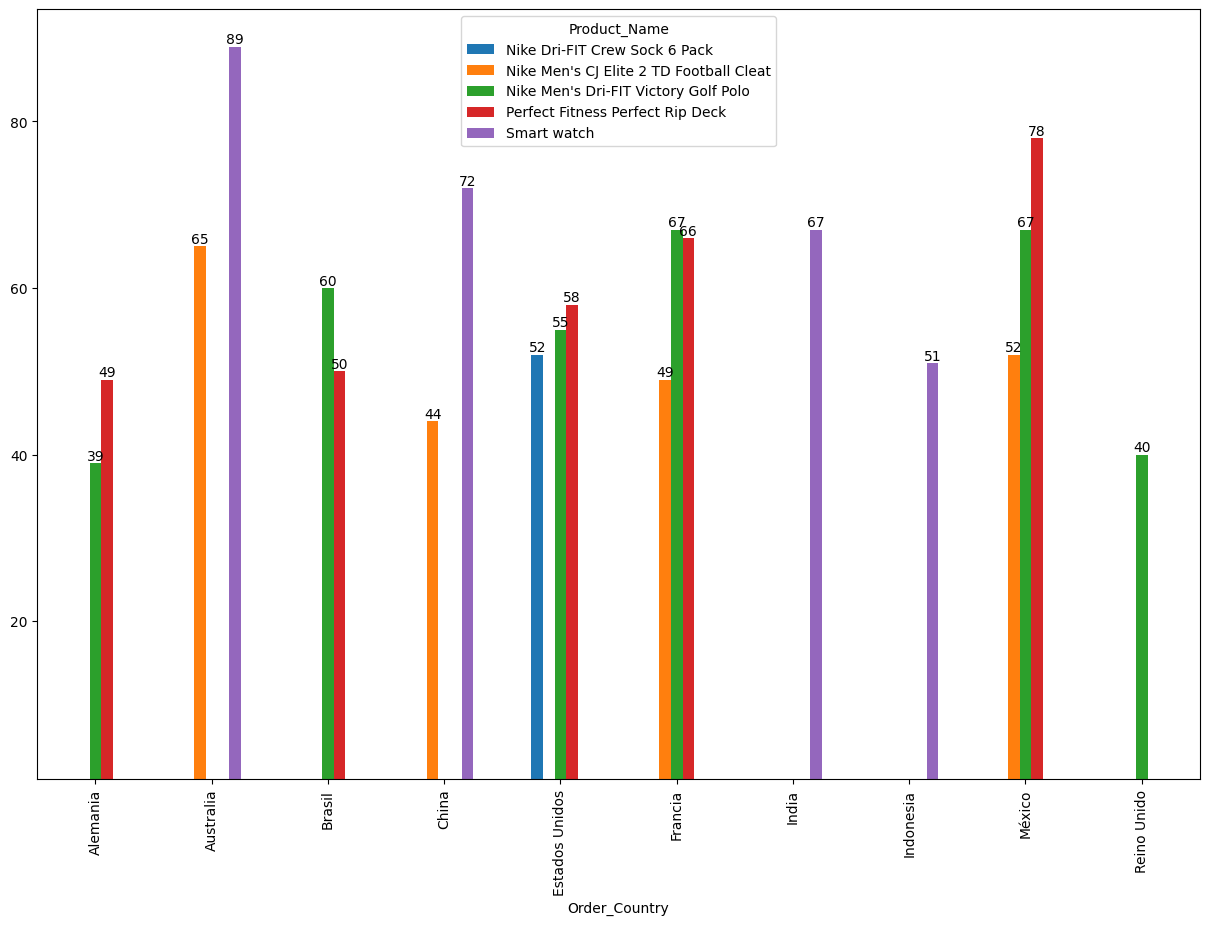

In [80]:
ax=product_df.groupby(['Order_Country', 'Product_Name'])['Product_Name'].count().nlargest(20).unstack().plot(kind='bar', figsize=(15, 10))
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylim(1)
plt.show()